# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [5]:
cd data

/Users/home/Ironhack/Week_4/2/lab-linear-regression-correlation/data


In [6]:
# Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


from sqlalchemy import create_engine
data = pd.read_csv('absences.csv')
data.drop(columns =['Unnamed: 0'])

,EmployeeID,Age,Absences
0,1,27,15
1,2,61,6
2,3,37,10
3,4,23,18
4,5,46,9
5,6,58,7
6,7,29,14
7,8,36,11
8,9,64,5
9,10,40,8


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

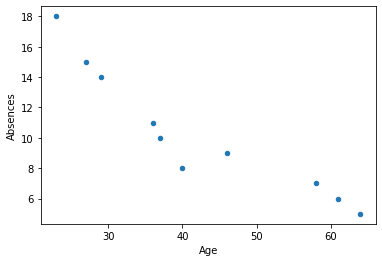

In [7]:
# your code here
data.plot.scatter('Age','Absences')

In [8]:
# your comments here

#there is a clear negative correlation to be observed, meaning that that younger people tend to have more absences

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [54]:
def simple_reg(x1,x2,y1,y2):
    d1 = x2 - x1
    d2 = y2 - y1
    m = d2/d1
    b = y1 - m*x1
    
    return m,b 

simple_reg(27,37,15,10)

(-0.5, 28.5)

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [64]:
# your code here
def lin_reg(X,Y):
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    squares = [(i*Y[i]/2) for i in range(len(X))]
    mean_xy = sum(squares) / len(X)
    x_squares = [i**2 for i in X]
    
    slope = (mean_x*mean_y - mean_xy)/mean_x**2 - (sum(x_squares)/len(x_squares)) 
    intercept = mean_y - slope * mean_x
    
    print('y = ', slope,'x + ', intercept)
    
    return slope, intercept


lin_reg(age,absences)


y =  -1965.867305533144 x +  82773.31356294536


(-1965.867305533144, 82773.31356294536)

In [9]:
# your code here
age = list(data['Age'])
absences = list(data['Absences'])

In [ ]:
# your comments here

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [62]:
# your code here
def get_covar(X, Y):
    n = len(X)
    X = [elem - np.mean(X) for elem in X]
    Y = [elem - np.mean(Y) for elem in Y]
    sum1 = 0
    for x,y in zip(X,Y):
        print('x = ', x,' y = ', y)
        sum1 = sum1 + x*y
    return sum1 / n

def get_correlation(X, Y):
    s_x = np.std(X) 
    s_y = np.std(Y)
    return get_covar(X,Y) / (s_x * s_y)


#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [12]:
# your code here
get_covar(age,absences)

x =  -15.100000000000001  y =  4.699999999999999
x =  18.9  y =  -4.300000000000001
x =  -5.100000000000001  y =  -0.3000000000000007
x =  -19.1  y =  7.699999999999999
x =  3.8999999999999986  y =  -1.3000000000000007
x =  15.899999999999999  y =  -3.3000000000000007
x =  -13.100000000000001  y =  3.6999999999999993
x =  -6.100000000000001  y =  0.6999999999999993
x =  21.9  y =  -5.300000000000001
x =  -2.1000000000000014  y =  -2.3000000000000007


-51.92999999999999

In [13]:
# your comments here
get_correlation(age,absences)

x =  -15.100000000000001  y =  4.699999999999999
x =  18.9  y =  -4.300000000000001
x =  -5.100000000000001  y =  -0.3000000000000007
x =  -19.1  y =  7.699999999999999
x =  3.8999999999999986  y =  -1.3000000000000007
x =  15.899999999999999  y =  -3.3000000000000007
x =  -13.100000000000001  y =  3.6999999999999993
x =  -6.100000000000001  y =  0.6999999999999993
x =  21.9  y =  -5.300000000000001
x =  -2.1000000000000014  y =  -2.3000000000000007


-0.9325434092481012

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
# your comments here

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [14]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})
ironbeers_df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,9


#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [15]:
# your code here
get_covar(list(ironbeers_df['X']), list(ironbeers_df['Y']))

x =  -6.0  y =  -4.0
x =  -4.0  y =  -3.0
x =  -3.0  y =  -1.0
x =  -1.0  y =  -1.0
x =  1.0  y =  0.0
x =  2.0  y =  2.0
x =  4.0  y =  3.0
x =  7.0  y =  4.0


10.5

In [16]:
# your comments here
get_correlation(list(ironbeers_df['X']), list(ironbeers_df['Y']))

x =  -6.0  y =  -4.0
x =  -4.0  y =  -3.0
x =  -3.0  y =  -1.0
x =  -1.0  y =  -1.0
x =  1.0  y =  0.0
x =  2.0  y =  2.0
x =  4.0  y =  3.0
x =  7.0  y =  4.0


0.9770084209183942

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

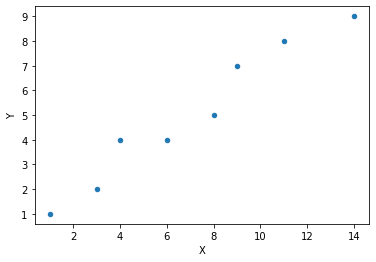

In [17]:
# your code here
ironbeers_df.plot.scatter('X','Y')

In [18]:
# your comments here
# the more people you tell to stay, the more are going to stay

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

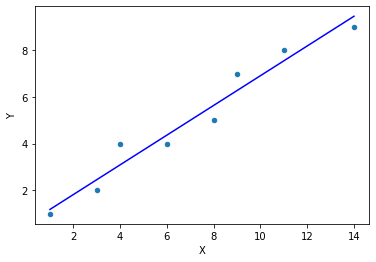

In [23]:
# your code here
clf = LinearRegression()
clf.fit(ironbeers_df[['X']], ironbeers_df['Y'])

ironbeers_df.plot.scatter('X','Y')

plt.plot(ironbeers_df['X'], clf.predict(ironbeers_df[['X']]), color="blue")

In [ ]:
# your comments here
#there is positive correlation between ironbeers and how many people you ask

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [24]:
# your comments here
# the more people you ask, the more are going to stay for Ironbeers

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here